# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w~puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}
\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}
\begin{equation}
A_xy = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [ ]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import math
import sys, time

# Load required files
if not os.path.exists("parrot.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/parrot.bmp --no-check-certificate
if not os.path.exists("chessboard.bmp") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/chessboard.bmp --no-check-certificate

parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
chessboard = cv2.imread('chessboard.bmp', cv2.IMREAD_GRAYSCALE)

# Load A matrix
A_inv = np.array([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[-3,  3,  0,  0, -2, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[2, -2,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0, -3,  3,  0,  0, -2, -1,  0,  0],
[0,  0,  0,  0,  0,  0,  0,  0,  2, -2,  0,  0,  1,  1,  0,  0],
[-3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0,  0,  0,  0,  0],
[0,  0,  0,  0, -3,  0,  3,  0,  0,  0,  0,  0, -2,  0, -1,  0],
[9, -9, -9,  9,  6,  3, -6, -3,  6, -6,  3, -3,  4,  2,  2,  1],
[-6,  6,  6, -6, -3, -3,  3,  3, -4,  4, -2,  2, -2, -2, -1, -1],
[2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0],
[0,  0,  0,  0,  2,  0, -2,  0,  0,  0,  0,  0,  1,  0,  1,  0],
[-6,  6,  6, -6, -4, -2,  4,  2, -3,  3, -3,  3, -2, -1, -2, -1],
[4, -4, -4,  4,  2,  2, -2, -2,  2, -2,  2, -2,  1,  1,  1,  1]])

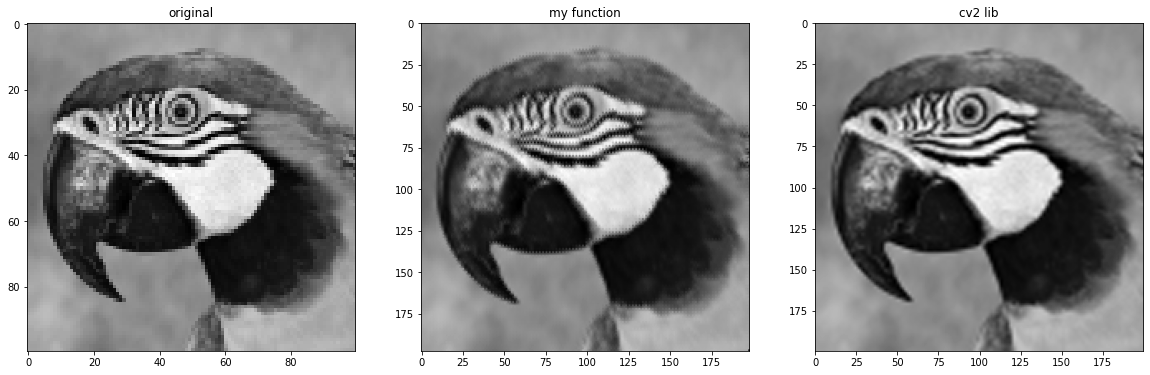

114.1664 112.85144265887509


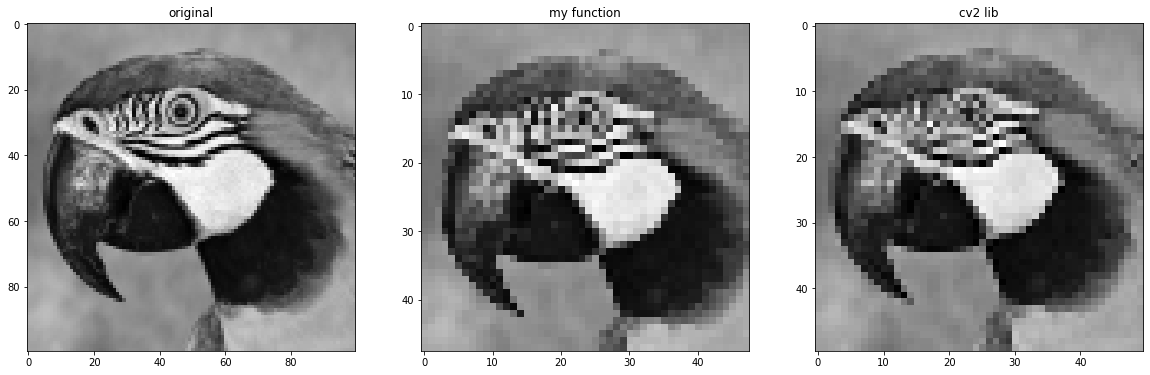

In [255]:
def bicubicInterpolation(img, hScale, vScale = None):
    X, Y = img.shape
    if vScale == None: vScale = hScale

    newX, newY = (int(hScale*X)-2, int(vScale*Y)-2)
    newImage = np.zeros((newX, newY), np.uint8)

    for i in range(newX):
        for j in range(newY):
            q = math.floor(i/hScale)
            w = math.floor(j/vScale)
            if q >= X-2:
                q = X-3
            if w >= Y-2:
                w = Y-3

            A = img[q, w]
            B = img[q+1, w]
            C = img[q+1, w+1]
            D = img[q, w+1]

            Ax = (int(img[q+1, w])-int(img[q-1, w]))/2
            Bx = (int(img[q+2, w])-int(img[q, w]))/2
            Cx = (int(img[q+2, w+1])-int(img[q, w+1]))/2
            Dx = (int(img[q+1, w+1])-int(img[q-1, w+1]))/2
            
            Ay = (int(img[q, w+1])-int(img[q, w-1]))/2
            By = (int(img[q+1, w+1])-int(img[q+1, w-1]))/2
            Cy = (int(img[q+1, w+2])-int(img[q+1, w]))/2
            Dy = (int(img[q, w+2])-int(img[q, w]))/2

            Axy = (int(img[q+1, w+1])-int(img[q-1, w])-int(img[q, w-1])-int(img[q, w]))/4
            Bxy = (int(img[q+2, w+1])-int(img[q, w])-int(img[q+1, w-1])-int(img[q+1, w]))/4
            Cxy = (int(img[q+2, w+2])-int(img[q, w+1])-int(img[q+1, w])-int(img[q+1, w+1]))/4
            Dxy = (int(img[q+1, w+2])-int(img[q-1, w+1])-int(img[q, w])-int(img[q, w+1]))/4
            
            x = np.array([[A,B,C,D,Ax,Bx,Cx,Dx,Ay,By,Cy,Dy,Axy,Bxy,Cxy,Dxy]]).T
            a = A_inv@x
            a = a.reshape(4,4).T

            x = i/hScale-q
            y = j/vScale-w 
            
            temp = 0;
            for ii in range(4):
                for jj in range(4):
                    temp += a[ii,jj]*x**ii*y**jj
            if temp > 255: temp = 255
            if temp < 0: temp = 0

            newImage[i, j] = temp

    return newImage

# Bigger
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(parrot, 'gray')
ax[0].set_title('original')
ax[1].imshow(bicubicInterpolation(parrot, 2), cmap='gray')
ax[1].set_title('my function')
resized = cv2.resize(parrot, (200,200), interpolation=getattr(cv2, str('INTER_CUBIC')))
ax[2].imshow(resized, 'gray')
ax[2].set_title('cv2 lib')
plt.show()
print(parrot.mean(), bicubicInterpolation(parrot, 1.5).mean())

# Smaller
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(parrot, 'gray')
ax[0].set_title('original')
ax[1].imshow(bicubicInterpolation(parrot, 0.5), cmap='gray')
ax[1].set_title('my function')
resized = cv2.resize(parrot, (50,50), interpolation=getattr(cv2, str('INTER_CUBIC')))
ax[2].imshow(resized, 'gray')
ax[2].set_title('cv2 lib')
plt.show()

Niestety nie udało mi się znaleźć błędu jeżeli ma Pan działającą implementacje proszę o podesłanie.